In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [5]:
data_folder = '/content/mnt/MyDrive/data/소상공인시장진흥공단/results/CoffeeIndex'

In [6]:
!ls -l $data_folder

total 460
-rw------- 1 root root 217704 Sep  6 23:58 이디야.csv
-rw------- 1 root root  32084 Sep  6 23:58 커피빈.csv
-rw------- 1 root root  61114 Sep  6 23:58 빽다방.csv
-rw------- 1 root root 158301 Sep  6 23:58 스타벅스.csv


In [7]:
df_E = pd.read_csv(f'{data_folder}/이디야.csv', encoding='utf-8')
df_C = pd.read_csv(f'{data_folder}/커피빈.csv', encoding='utf-8')
df_B = pd.read_csv(f'{data_folder}/빽다방.csv', encoding='utf-8')
df_S = pd.read_csv(f'{data_folder}/스타벅스.csv', encoding='utf-8')
print(df_E.shape)
df_E.head()

(2120, 5)


,상호명,지점명,시도명,시군구명,도로명주소
0,이디야커피,원주반곡동점,강원도,원주시,강원도 원주시 오리현길 16-9
1,이디야커피,춘천제일점,강원도,춘천시,강원도 춘천시 춘주로 89
2,이디야커피,흥업점,강원도,원주시,강원도 원주시 흥업면 남원로 85
3,이디야커피,속초동명항점,강원도,속초시,강원도 속초시 동명항길 49
4,이디야커피,정동진역점,강원도,강릉시,강원도 강릉시 강동면 정동역길 17


In [8]:
print(len(df_E))
print(len(df_E.시군구명.unique()))
df_E.시군구명.unique()

2120
219


array(['원주시', '춘천시', '속초시', '강릉시', '평창군', '정선군', '철원군', '화천군', '홍천군',
       '양구군', '삼척시', '인제군', '양양군', '동해시', '영월군', '태백시', '횡성군', '김천시',
       '칠곡군', '구미시', '안동시', '경주시', '포항시 북구', '문경시', '경산시', '울진군', '청송군',
       '고령군', '영주시', '상주시', '포항시 남구', '성주군', '영천시', '예천군', '영덕군', '청도군',
       '창원시 의창구', '거제시', '창원시 성산구', '함안군', '김해시', '창녕군', '진주시', '사천시',
       '창원시 마산합포구', '양산시', '거창군', '창원시', '밀양시', '고성군', '창원시 진해구',
       '창원시 마산회원구', '산청군', '남해군', '합천군', '통영시', '함양군', '광산구', '남구', '서구',
       '북구', '동구', '유성구', '대덕구', '중구', '수성구', '달성군', '달서구', '세종특별자치시',
       '해운대구', '사하구', '수영구', '부산진구', '동래구', '사상구', '금정구', '기장군', '연제구',
       '영도구', '강서구', '울주군', '부평구', '남동구', '강화군', '미추홀구', '계양구', '연수구',
       '옹진군', '목포시', '광양시', '무안군', '나주시', '순천시', '여수시', '해남군', '장흥군',
       '영광군', '고흥군', '영암군', '강진군', '완도군', '곡성군', '장성군', '담양군', '구례군',
       '화순군', '이천시', '수원시 장안구', '용인시 수지구', '고양시 덕양구', '성남시 분당구',
       '고양시 일산동구', '김포시', '파주시', '남양주시', '오산시', '부천시', '고양시 일산서구', '의정부시',
       '양

In [9]:
tmp_gu_dict = {
    '수원':['장안구', '권선구', '팔달구', '영통구'], 
    '성남':['수정구', '중원구', '분당구'], 
    '안양':['만안구', '동안구'], 
    '안산':['상록구', '단원구'], 
    '고양':['덕양구', '일산동구', '일산서구'], 
    '용인':['처인구', '기흥구', '수지구'], 
    '청주':['상당구', '서원구', '흥덕구', '청원구'], 
    '천안':['동남구', '서북구'], 
    '전주':['완산구', '덕진구'], 
    '포항':['남구', '북구'], 
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [10]:
metro_list = ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']
new_list = ['용인시', '안산시', '청주시', '전주시', '천안시', '고양시', '수원시', '성남시', '안양시', '세종특별자치시', '창원시', '포항시'  ]

def get_ID(df):
  si_name = [None] * len(df)

  for i in df.index:
      if df.시도명[i] in metro_list:
          if len(df.시군구명[i]) == 2:
              si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i]
          else:
              si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i][:-1]     # 긴 구 이름에서 '구' 제외
      else:
          si_len = len(df.시군구명[i].split())
          if si_len == 1:
            if df.시군구명[i][:-1] == '고성':
              if df.시도명[i] == '강원도':
                  si_name[i] = '고성(강원)'
              else:
                  si_name[i] = '고성(경남)'
            elif df.시군구명[i][:-1] in tmp_gu_dict.keys():


            elif df.시군구명[i][:2] == '세종':
              si_name[i] = '세종'
            else:
              si_name[i] = df.시군구명[i][:-1]

          else:
            _, admingu = df.시군구명[i].split()
            for key, values in tmp_gu_dict.items():
              if df.시군구명[i] in values:
                  if len(df.시군구명[i]) == 2:
                      si_name[i] = key + ' ' + df.시군구명[i]
                  elif df.시군구명[i] in ['마산합포구', '마산회원구']:
                      si_name[i] = key + ' ' + df.시군구명[i][2:-1]
                  else:
                      si_name[i] = key + ' ' + df.시군구명[i][:-1]

  return si_name

In [12]:
df_E['ID'] = get_ID(df_E)
df_C['ID'] = get_ID(df_C)
df_B['ID'] = get_ID(df_B)
df_S['ID'] = get_ID(df_S)
print(df_S.shape)
df_S.head()

(1547, 6)


,상호명,지점명,시도명,시군구명,도로명주소,ID
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원)
2,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318,춘천
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천
4,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초


In [13]:
df_E['상호명2'] = '이디야'
df_C['상호명2'] = '커피빈'
df_B['상호명2'] = '빽다방'
df_S['상호명2'] = '스타벅스'

In [14]:
df_e = pd.pivot_table(df_E, 
                    index = ['ID'], values=['상호명2'], aggfunc='count'
                    )
df_e['상호명'] = '이디야'
df_e.rename(columns = {'상호명2': '점포수'}, inplace = True)
df_e = df_e[['상호명', '점포수']]
print(df_e.shape)
df_e.tail()

(208, 2)


,상호명,점포수
ID,,
홍천,이디야,3
화성,이디야,28
화순,이디야,1
화천,이디야,1
횡성,이디야,1


In [15]:
df_c = pd.pivot_table(df_C, 
                    index = ['ID'], values=['상호명2'], aggfunc='count'
                    )
df_c['상호명'] = '커피빈'
df_c.rename(columns = {'상호명2': '점포수'}, inplace = True)
df_c = df_c[['상호명', '점포수']]
print(df_c.shape)
df_c.head()

(73, 2)


,상호명,점포수
ID,,
경주,커피빈,2
광명,커피빈,1
광주 남구,커피빈,2
광주 동구,커피빈,1
광주 서구,커피빈,2


In [16]:
df_b = pd.pivot_table(df_B, 
                    index = ['ID'], values=['상호명2'], aggfunc='count'
                    )
df_b['상호명'] = '빽다방'
df_b.rename(columns = {'상호명2': '점포수'}, inplace = True)
df_b = df_b[['상호명', '점포수']]
print(df_b.shape)
df_b.tail()

(138, 2)


,상호명,점포수
ID,,
홍성,빽다방,2
홍천,빽다방,1
화성,빽다방,10
화순,빽다방,1
화천,빽다방,1


In [17]:
df_s = pd.pivot_table(df_S, 
                    index = ['ID'], values=['상호명2'], aggfunc='count'
                    )
df_s['상호명'] = '스타벅스'
df_s.rename(columns = {'상호명2': '점포수'}, inplace = True)
df_s = df_s[['상호명', '점포수']]
print(df_s.shape)
df_s.head()

(163, 2)


,상호명,점포수
ID,,
가평,스타벅스,2
강릉,스타벅스,5
거제,스타벅스,6
경산,스타벅스,8
경주,스타벅스,8


In [18]:
df = pd.concat([df_e, df_c, df_b, df_s])
print(df.shape)
df.tail()

(582, 2)


,상호명,점포수
ID,,
하동,스타벅스,1
함양,스타벅스,1
홍천,스타벅스,2
화성,스타벅스,16
횡성,스타벅스,1


In [19]:
result = 0
for _, row in df.iterrows():
    result = (df.loc[df['상호명'] == '스타벅스', '점포수'] + df.loc[df['상호명'] == '커피빈', '점포수']) / (df.loc[df['상호명'] == '이디야', '점포수'] + df.loc[df['상호명'] == '빽다방', '점포수'])
result

ID
가평         NaN
강릉         NaN
강진         NaN
거제         NaN
거창         NaN
        ...   
홍천         NaN
화성    0.552632
화순         NaN
화천         NaN
횡성         NaN
Name: 점포수, Length: 213, dtype: float64

In [20]:
coffee_index = pd.DataFrame(result)
coffee_index.rename(columns = {'점포수' : '커피지수'}, inplace = True)
coffee_index.head(3)

,커피지수
ID,
가평,NaN
강릉,NaN
강진,NaN


In [21]:
coffee_index.fillna(0, inplace=True)
coffee_index.head(3)

,커피지수
ID,
가평,0.0
강릉,0.0
강진,0.0


In [22]:
map_folder = '/content/mnt/MyDrive/data/인구소멸위기지역'

In [23]:
map_raw = pd.read_excel(f'{map_folder}/draw_korea_raw(2021).xlsx')

In [24]:
map_raw.stack()[:10]

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         인제
dtype: object

In [25]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [26]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [ ]:
!cp $map_folder/draw_map.py .

In [28]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

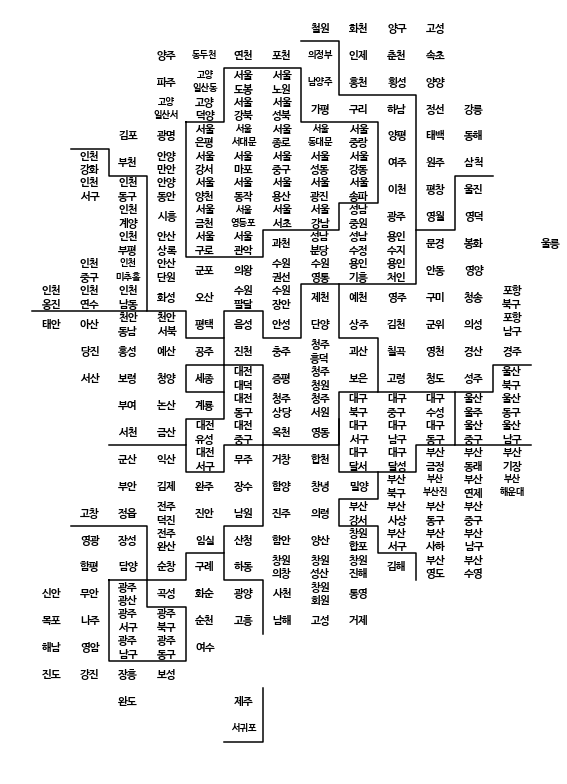

In [29]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
coffee_index = pd.merge(coffee_index, map, how='left', on='ID')
print(coffee_index.shape)
coffee_index.head()

(213, 4)


,ID,커피지수,y,x
0,가평,0.0,3.0,7.0
1,강릉,0.0,3.0,11.0
2,강진,0.0,24.0,1.0
3,거제,0.0,22.0,8.0
4,거창,0.0,16.0,6.0


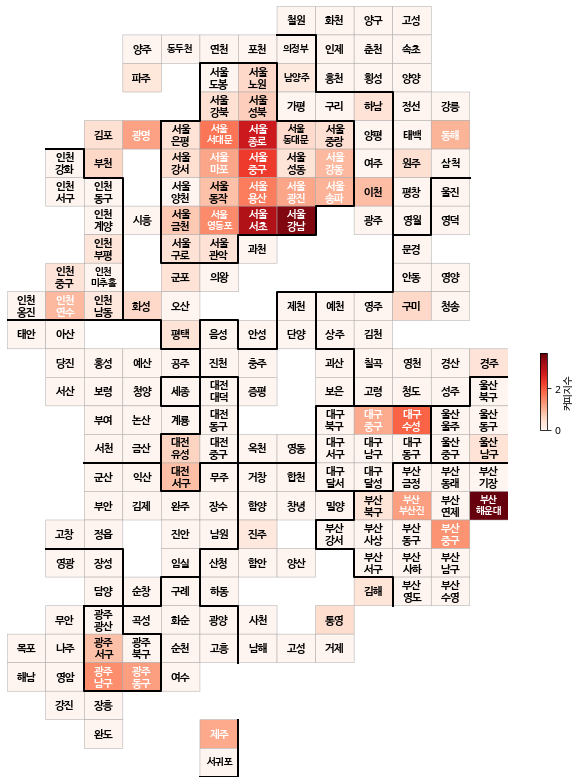

In [31]:
drawKorea('커피지수', coffee_index, 'Reds')

In [32]:
import folium
import json

In [33]:
coffee_index.set_index('ID', inplace=True )
coffee_index.head()

,커피지수,y,x
ID,,,
가평,0.0,3.0,7.0
강릉,0.0,3.0,11.0
강진,0.0,24.0,1.0
거제,0.0,22.0,8.0
거창,0.0,16.0,6.0


In [34]:
geo_data = json.load(open(f'{map_folder}/skorea_municipalities_geo_simple.json'))

map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(
    geo_data=geo_data,
    data=coffee_index.커피지수,
    columns=coffee_index.index,
    key_on='feature.id',
    fill_color='PuRd',
    legend_name='커피지수'
).add_to(map)



title = '<h3 align="center" style="font-size:20px">지역별 커피지수</h3>'
map.get_root().html.add_child(folium.Element(title))
map